In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from matplotlib.pyplot import figure

In [161]:
dataset=pd.read_csv("survey_ncr.csv")

# Question 1. Analyse the data (descriptive statistics and visualization) 

# Description :
ABC, a leading market research agency in Delhi, conducted a primary household survey in the Delhi region for an FI client planning to launch its financial products. The objective of the survey was to study the socio-economic status of the people living in the Delhi Development Authority flats. A total 29,834 respondents were interviewed. ABC wants to determine the factors that influence the monthly income of the respondents, so that it will help its client to streamline its marketing strategy.

In [162]:
dataset.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,47,Private,10th,6,Executive,Unmarried,ST,Female,45,less than 30 k INR
1,40,Private,10th,6,Mechanic,Unmarried,ST,Male,40,less than 30 k INR
2,30,Private,10th,6,Other-service,Unmarried,ST,Male,40,less than 30 k INR
3,27,Private,10th,6,Taxi-driver,Unmarried,ST,Male,75,less than 30 k INR
4,38,Private,10th,6,Driver,Unmarried,Christians,Female,40,less than 30 k INR


In [163]:
dataset.shape

(29834, 10)

In [164]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29834 entries, 0 to 29833
Data columns (total 10 columns):
age               29834 non-null int64
job_type          29834 non-null object
education         29834 non-null object
education_num     29834 non-null int64
job               29834 non-null object
marital_status    29834 non-null object
religion          29834 non-null object
gender            29834 non-null object
hours_per_week    29834 non-null int64
income            29834 non-null object
dtypes: int64(3), object(7)
memory usage: 2.3+ MB


In [165]:
dataset.isnull().sum()

age               0
job_type          0
education         0
education_num     0
job               0
marital_status    0
religion          0
gender            0
hours_per_week    0
income            0
dtype: int64

# Categorical Variables

In [166]:
for i in dataset.columns:
    if dataset[i].dtype=='object':
        print(i)

job_type
education
job
marital_status
religion
gender
income


# Continous Variables

In [167]:
for i in dataset.columns:
    if dataset[i].dtype!='object':
        print(i)

age
education_num
hours_per_week


# Univarient Analysis

In [168]:
sns.set()

In [169]:
def continous_data(i):
    if dataset[i].dtype!='object':
        print('--'*500)
        sns.boxplot(dataset[i])
        plt.title("Boxplot---"+str(i))
        plt.show()
        plt.title("histogram---"+str(i))
        sns.set()
        dataset[i].plot.hist()
        plt.show()
        dataset[i].plot.kde()
        plt.show()
        plt.clf()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

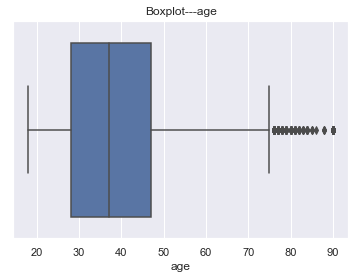

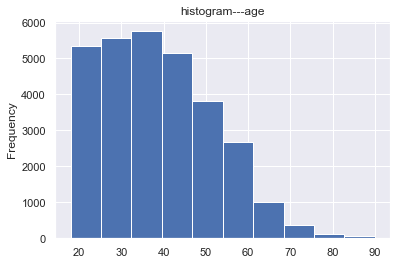

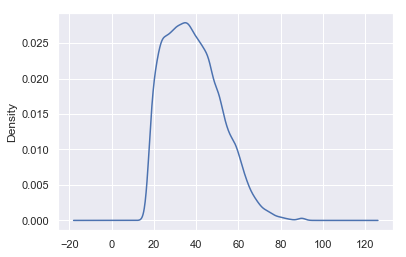

None


<Figure size 432x288 with 0 Axes>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

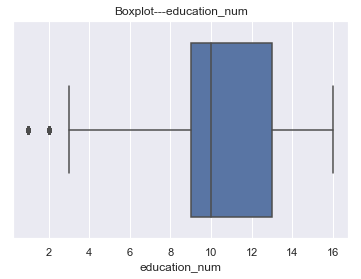

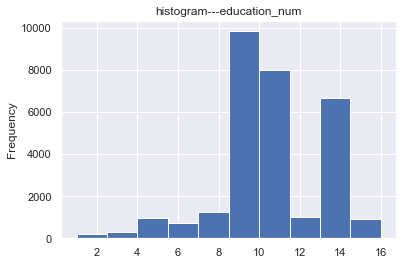

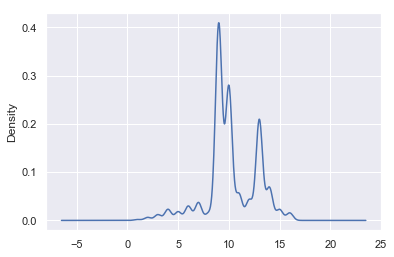

None


<Figure size 432x288 with 0 Axes>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

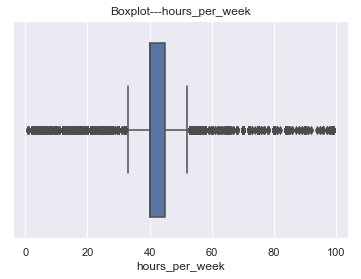

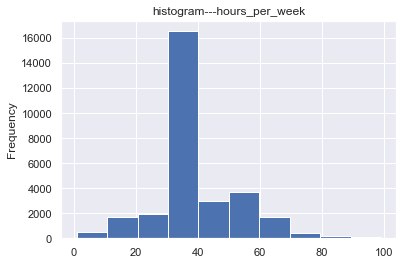

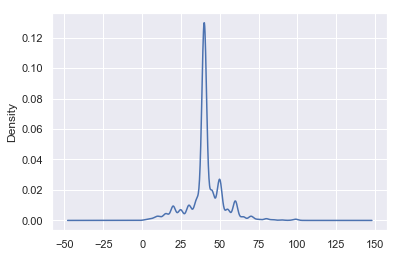

None


<Figure size 432x288 with 0 Axes>

In [170]:
c=['age','education_num','hours_per_week']
for i in c:
    print(continous_data(i))
    sns.set()    
    plt.show()
    

Age --the distrubution is right skewed in this column
Education_num--the distrubution is left skewed in this column
Hours_per_week---the distrubution is left skewed in this column

In [171]:
def categorical_data(i):
    dataset[i].value_counts().plot(kind='bar')
    print("categorical_variable-----"+i)

In [172]:
dataset['job_type'].unique()[1]

'Government'

categorical_variable-----job_type


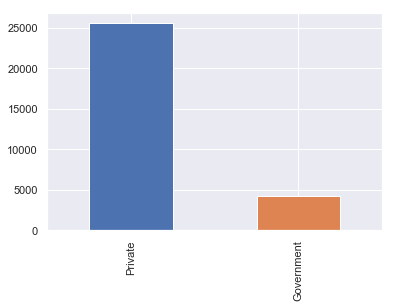

categorical_variable-----education


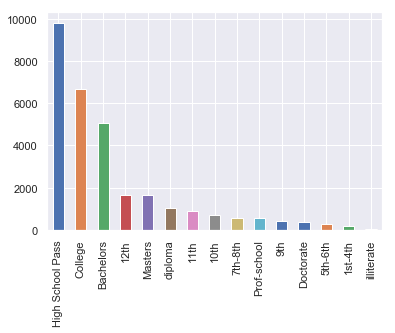

categorical_variable-----job


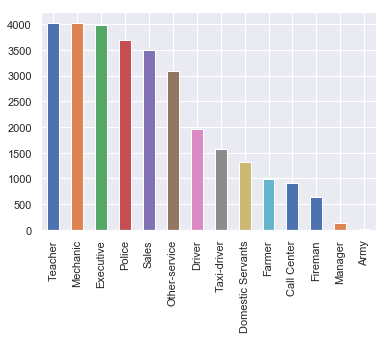

categorical_variable-----marital_status


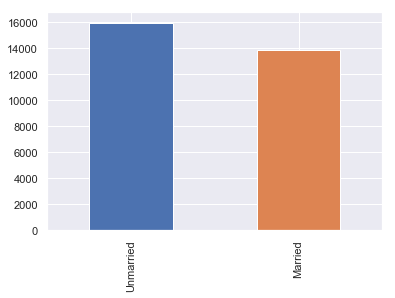

categorical_variable-----religion


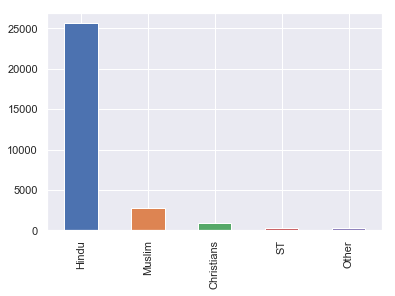

categorical_variable-----gender


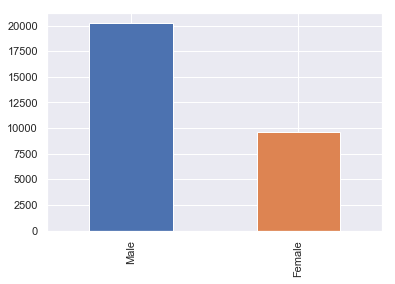

categorical_variable-----income


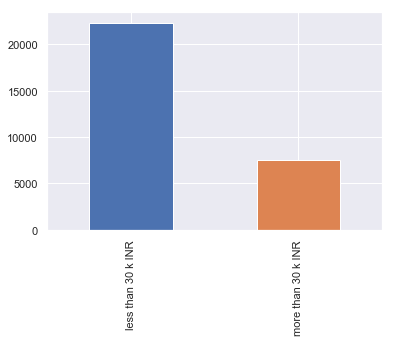

In [173]:
ca=['job_type','education','job','marital_status','religion','gender','income']
for i in ca:
    categorical_data(i)
    plt.show()

# Multivarient analysis

In [174]:
correlation=dataset.corr()
correlation

,age,education_num,hours_per_week
age,1.000000,0.019638,0.073311
education_num,0.019638,1.000000,0.131257
hours_per_week,0.073311,0.131257,1.000000


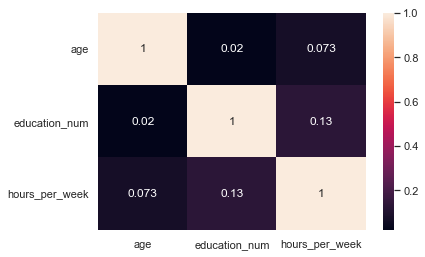

In [175]:
sns.heatmap(dataset.corr(), annot=True)

In [176]:
def categorical_multi(i,j):
    pd.crosstab(dataset[i],dataset[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(dataset[i],dataset[j]))
    print('*'*300)

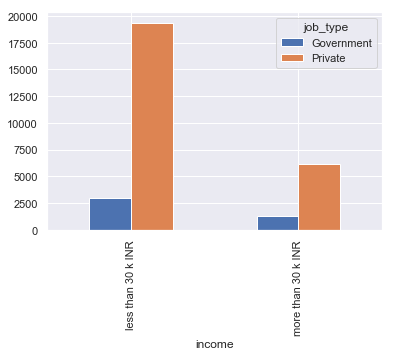

job_type            Government  Private
income                                 
less than 30 k INR        2954    19372
more than 30 k INR        1318     6190
************************************************************************************************************************************************************************************************************************************************************************************************************


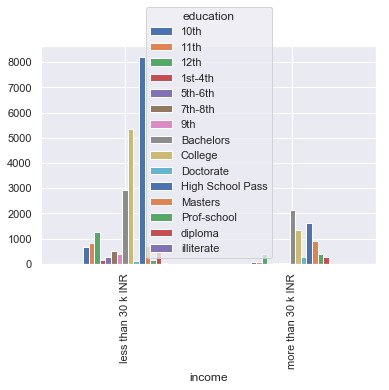

education           10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  \
income                                                                 
less than 30 k INR   655   835  1279      145      275      519  407   
more than 30 k INR    59    59   373        6       12       35   25   

education           Bachelors  College  Doctorate  High School Pass  Masters  \
income                                                                         
less than 30 k INR       2918     5340         95              8216      709   
more than 30 k INR       2126     1336        280              1617      918   

education           Prof-school  diploma  illiterate  
income                                                
less than 30 k INR          136      752          45  
more than 30 k INR          406      256           0  
**************************************************************************************************************************************************************************

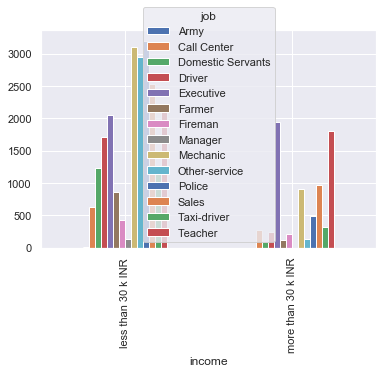

job                 Army  Call Center  Domestic Servants  Driver  Executive  \
income                                                                        
less than 30 k INR     8          633               1228    1719       2054   
more than 30 k INR     1          278                 83     245       1937   

job                 Farmer  Fireman  Manager  Mechanic  Other-service  Police  \
income                                                                          
less than 30 k INR     865      431      134      3108           2951    3200   
more than 30 k INR     115      210        1       908            132     498   

job                 Sales  Taxi-driver  Teacher  
income                                           
less than 30 k INR   2528         1250     2217  
more than 30 k INR    970          319     1811  
**************************************************************************************************************************************************************

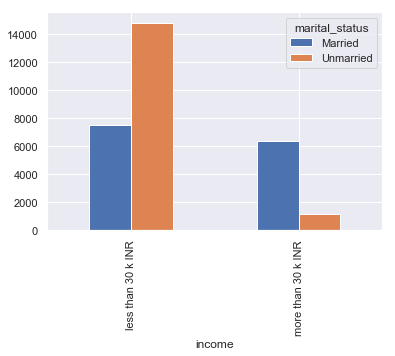

marital_status      Married  Unmarried
income                                
less than 30 k INR     7495      14831
more than 30 k INR     6373       1135
************************************************************************************************************************************************************************************************************************************************************************************************************


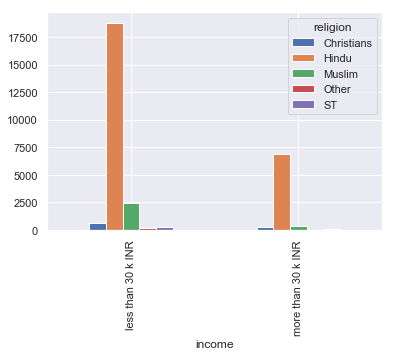

religion            Christians  Hindu  Muslim  Other   ST
income                                                   
less than 30 k INR         646  18800    2425    206  249
more than 30 k INR         248   6839     366     21   34
************************************************************************************************************************************************************************************************************************************************************************************************************


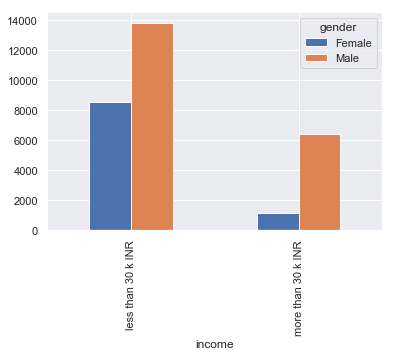

gender              Female   Male
income                           
less than 30 k INR    8520  13806
more than 30 k INR    1112   6396
************************************************************************************************************************************************************************************************************************************************************************************************************


In [177]:
ca=['job_type','education','job','marital_status','religion','gender']
for l in ca:
    categorical_multi(i='income',j=l)

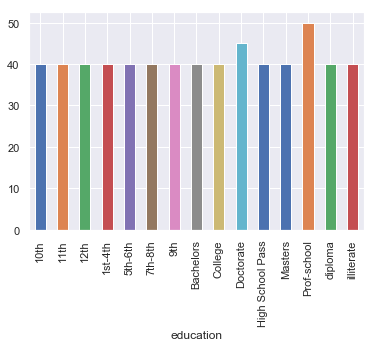

In [178]:
dataset.groupby('education').hours_per_week.median().plot(kind='bar')

# Treatment of Outlier

In [192]:
j=['age','education_num','hours_per_week']
for k in j:
    IQR=np.percentile(dataset[k],75)-np.percentile(dataset[k],25)
    Outlier_top=np.percentile(dataset[k],75)+1.5*IQR
    Outlier_bottom=np.percentile(dataset[k],25)-1.5*IQR
    dataset[k]=np.where(dataset[k] >Outlier_top,np.percentile(dataset[k],50),dataset[k])
    dataset[k]=np.where(dataset[k]<Outlier_bottom,np.percentile(dataset[k],50),dataset[k])

In [193]:
def continous_data(i):
    if dataset[i].dtype!='object':
        print('--'*500)
        sns.boxplot(dataset[i])
        plt.title("Boxplot---"+str(i))
        plt.show()
        plt.title("histogram---"+str(i))
        sns.set()
        dataset[i].plot.kde()
        plt.show()
        plt.clf()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

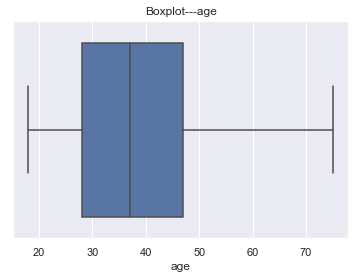

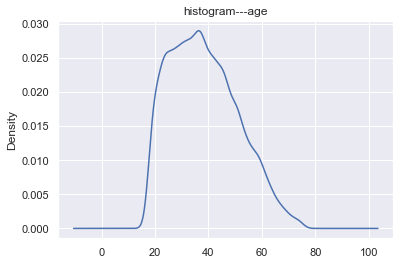

<Figure size 432x288 with 0 Axes>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

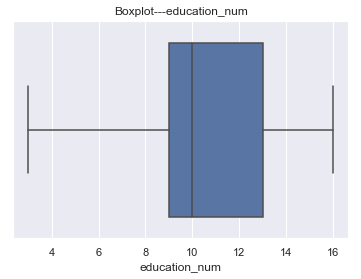

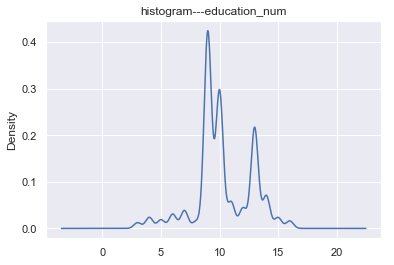

<Figure size 432x288 with 0 Axes>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

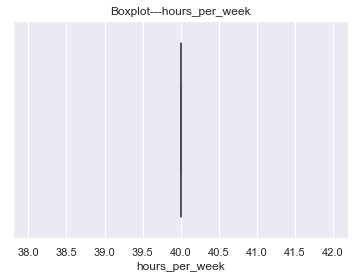

LinAlgError: singular matrix

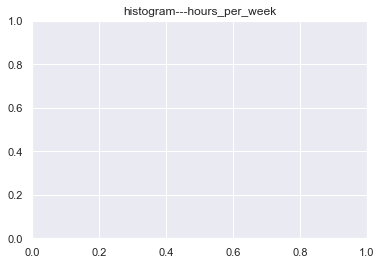

In [194]:
for i in j:
    continous_data(i)
    plt.show()

# Creating dummy variables

In [196]:
ca=['job_type','education','job','marital_status','religion','gender']
for i in ca:
    channell = pd.get_dummies(dataset[i],prefix=i,drop_first=True)
#Adding the results to the master dataframe
    dataset = pd.concat([dataset,channell],axis=1)
    dataset.drop([i],axis=1,inplace=True)

In [198]:
dataset['income'].unique()

array(['less than 30 k INR', 'more than 30 k INR'], dtype=object)

In [199]:
dataset['income'].replace(['less than 30 k INR', 'more than 30 k INR'],[0,1],inplace=True)

In [202]:
dataset.head()

,age,hours_per_week,income,job_type_Private,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,...,job_Police,job_Sales,job_Taxi-driver,job_Teacher,marital_status_Unmarried,religion_Hindu,religion_Muslim,religion_Other,religion_ST,gender_Male
0,47.0,40.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,40.0,40.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,30.0,40.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,27.0,40.0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
4,38.0,40.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [201]:
dataset.drop(['education_num'],inplace=True,axis=1)

# Splitting the dataset into train and test 

In [205]:
X=dataset.drop(['income'],axis=1)
y=dataset['income']

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [207]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(20883, 36)
(8951, 36)
(20883,)
(8951,)


# Question 2. Build a Random Forest model to predict Income 

In [228]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100, max_depth=5,random_state=1)
rfcl.fit(X_train,y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [229]:
y_pred=rfcl.predict(X_test)

In [230]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
print(acc)

0.8090716121103787


In [232]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[6422 1454]
 [ 255  820]]


0---"less than 30 k INR" 
Around 60% of income less than 30k is misclassified this can be balanced by Smote techinque
Inorder to increase accuracy try to decrease the number of misclassification in category 0

# Question 3. Build a Gradient Boosting model to predict Income

In [225]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100, random_state=1)
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [226]:
y_pred1=gbcl.predict(X_test)

In [227]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred1,y_test)
print(acc)

0.824488883923584


In [234]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred1,y_test)
print(cm)

[[6181 1075]
 [ 496 1199]]


Previously when the model is fitted to random_forest more number of misclassification had taken place but incase of Boosting this had moderate misclassification so we can say that the Boosting done better performance when compared to the bagging techniques

# Question 4. Improve the accuracy by optimizing hyperparameters of the models

In [237]:
print('Parameters currently in use:\n')
print(rfcl.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [238]:
from sklearn.model_selection import GridSearchCV

In [249]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [i for i in range(1,20)],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [250]:
rfcl_improve = RandomForestClassifier(random_state = 1)

In [251]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [252]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [254]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 18,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 7}

In [253]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.8219193386213831

# Best parameters for Random_forest
{'bootstrap': True,
 'max_depth': 18,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 7}
 
 And the accuracy_score is 82.191%

In [256]:
# Through Gradient boosting

In [255]:
print('Parameters currently in use:\n')
print(gbcl.get_params())

Parameters currently in use:

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}


In [271]:
param_grid = {
    'learning_rate': [0.1,0.4,0.8],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,100]
}    

In [272]:
gfcl=GradientBoostingClassifier(learning_rate=0.01,random_state=1)

In [273]:
grid_search1 = GridSearchCV(estimator = gfcl, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [274]:
grid_search1.fit(X_train, y_train);

In [275]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [276]:
best_grid1 = grid_search1.best_estimator_
best_grid1.score(X_test, y_test)

0.8248240420064797

# Best parameters for Gradient Boosting

# Question 5. Find the important variables 

# Best predictors when the model is fitted to the RandomForest

In [280]:
a=pd.DataFrame(sorted(best_grid.feature_importances_*100,reverse=True), columns = ["Imp_RandomForest"], index = X_train.columns)
print(a)

                            Imp_RandomForest
age                                17.868335
hours_per_week                     16.503177
job_type_Private                    9.414847
education_11th                      8.338826
education_12th                      6.784604
education_1st-4th                   5.286875
education_5th-6th                   4.943796
education_7th-8th                   4.738167
education_9th                       4.615948
education_Bachelors                 4.112725
education_College                   3.647489
education_Doctorate                 2.728816
education_High School Pass          1.299816
education_Masters                   1.252910
education_Prof-school               1.061997
education_diploma                   1.020000
education_illiterate                1.012886
job_Call Center                     0.804206
job_Domestic Servants               0.723669
job_Driver                          0.559961
job_Executive                       0.541828
job_Farmer

# Best predictors when the model is fitted to the GradientBoosting

In [281]:
b=pd.DataFrame(sorted(best_grid1.feature_importances_*100,reverse=True), columns = ["ImpGradientBoosting"], index = X_train.columns)
print(b)

                            ImpGradientBoosting
age                                   24.692105
hours_per_week                        20.541984
job_type_Private                       5.057945
education_11th                         4.537052
education_12th                         4.504593
education_1st-4th                      4.354833
education_5th-6th                      3.089710
education_7th-8th                      2.999535
education_9th                          2.956213
education_Bachelors                    2.583295
education_College                      2.025626
education_Doctorate                    1.816520
education_High School Pass             1.545326
education_Masters                      1.533108
education_Prof-school                  1.346063
education_diploma                      1.284256
education_illiterate                   1.258206
job_Call Center                        1.220368
job_Domestic Servants                  1.105416
job_Driver                             1

# Question 6. Comparison of the models' performance and suggest the best model

In [282]:
comparison=pd.DataFrame({'models':['Random_Forest','GradientBoosting'],'Accuracy':[0.8219193386213831,0.824488883923584]})

In [283]:
print(comparison)

             models  Accuracy
0     Random_Forest  0.821919
1  GradientBoosting  0.824489


In [ ]:
# The model with GradientBoosting is the best one when you look at the confusion_matrix for both of them the misclassification of 0 is done some what better with the GradientBoosting
# But when comparing the accuracy it is almost close for both the algorithms